In [7]:
from IPython.display import Image

# chap 15. RNN과 CNN을 사용해 시퀀스 처리하기

> RNN (recurrent neural networks)

> - 미래를 예측 ex) 주가
- 임의 길이를 가진 시퀀스를 다룰 수 있음 ex) NLP에 유용


## 15.1 순환뉴런과 순환 층

- RNN은 입력을 받아 출력을 만들고 + 자신에게도 출력을 보냄




### 뉴런 하나로 구성된 간단한 RNN

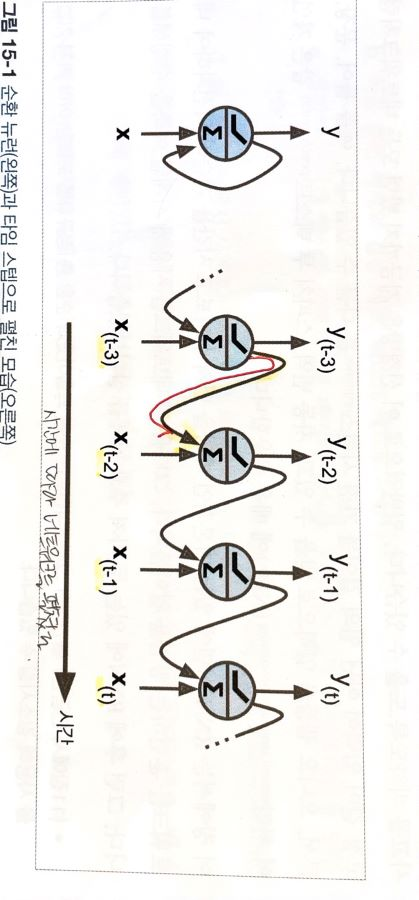

In [8]:
Image("pic_15_1.jpg")

- 타임스텝 마다 순환뉴런은 물론 **${x_{(t)}}$** , $y_{(t-1)}$을 입력으로 받음
- 뉴런이 하나일 땐, 출력이 스칼라

### 순환뉴런으로 된 층

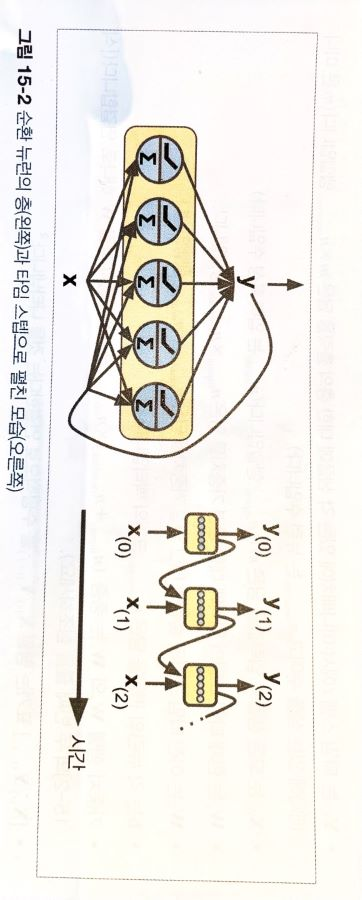

In [9]:
Image("pic_15_2.jpg")

- 타임스텝 마다 순환뉴런은 물론 **${x_{(t)}}$** , 벡터 **$y_{(t-1)}$**을 입력으로 받음

- 각 순환 뉴런은 두 벌의 가중치를 가짐
    - **${x_{(t)}}$** , **$y_{(t-1)}$**를 위한 **$w_{x}$**와 **$w_{y}$**
    - 순환 뉴런 전체일 땐 가중치 행렬 $\mathbf W_{x}$와 $\mathbf W_{y}$

- 식 표현 (식 15-1)
    - $\mathbf y_{(t)}$ = $\Phi$($\mathbf W_{x}$$^{T}$$\mathbf x_{(t)}$ + $\mathbf W_{y}$$^{T}$$\mathbf y_{(t-1)}$ +$\mathbf b$) , where $\Phi$(.) : 활성화 함수

- 미니배치에 있는 전체 샘플에 대한 순환 뉴런 층의 출력 (모든 입력을 행렬 $\mathbf X_{(t)}$로 만듦)
    - $\mathbf Y_{(t)}$ = $\Phi$($\mathbf X_{(t)}$$\mathbf W_{x}$ +$\mathbf Y_{(t-1)}$$\mathbf W_{y}$ +$\mathbf b$) 
    =  $\Phi$($ \left[\mathbf X_{(t)} \mathbf Y_{(t-1)}) \right] $$\mathbf W$ +$\mathbf b$)
    , where $\mathbf W$ = $ \left[\mathbf W_{x} , \mathbf W_{y} \right] ^T$

-  $\mathbf Y_{(t)}$는 시간 t=0에서부터 모든 입력에 대한 함수

## 15.1.1 메모리 셀

- 타임 스텝 t에서 순환 뉴런의 출력은 이전 타임 스텝의 모든 입력에 대한 함수이므로 ** _메모리_ ** 형태 라고 말할 수 
있음

- 타임 스텝에 걸쳐서 어떤 상태를 보존하는 신경망의 구성 요소를 ** _메모리 셀_ **이라고 함
    - 하나의 순환 뉴런 또는 순환 뉴런의 층은 짧은 패턴만 학습할 수 있는 기본적인 셀

- ${\mathbf h_{(t)}}$은 현재 타임스텝의 입력과 이전 타임 스텝의 **상태**에 대한 함수
    - 즉, ${\mathbf h_{(t)}}$ = $f(\mathbf h_{(t-1)},\mathbf x{(t)})$
    - 타임스텝 t의 출력 ${\mathbf y_{(t)}}$도 이전 상태와 현재 입력에 대한 함수

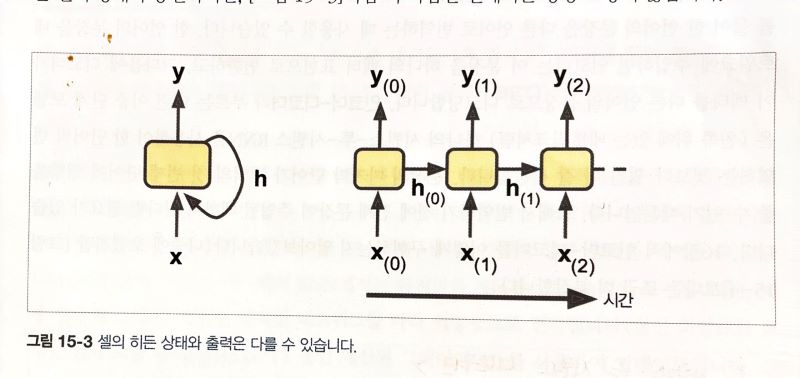

In [12]:
Image("pic_15_3.jpg")

## 15.1.2 입력과 출력 시퀀스

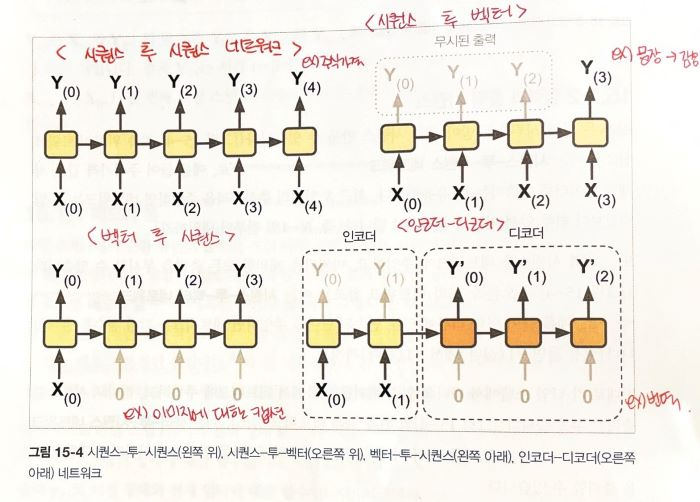

In [14]:
Image("pic_15_4.jpg")